In [1]:
# Step 0: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


In [2]:

# Step 1: Data Collection
ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-03-1'


df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:

# Step 2: Exploratory Data Analysis (EDA)
# Data Overview
print("Data shape:", df.shape)


Data shape: (291, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 2020-01-02 to 2021-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       291 non-null    float64
 1   High       291 non-null    float64
 2   Low        291 non-null    float64
 3   Close      291 non-null    float64
 4   Adj Close  291 non-null    float64
 5   Volume     291 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.9 KB


In [5]:

print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057737   
std     24.146867   24.227884   23.670557   23.925393   23.657541   
min     57.020000   57.125000   53.152500   56.092499   54.706997   
25%     78.651249   79.614998   77.904999   78.746250   76.842171   
50%     99.172501   99.955002   96.742500   98.357498   96.187706   
75%    120.430000  122.810001  118.884998  120.919998  118.465683   
max    143.600006  145.089996  141.369995  143.160004  140.496246   

             Volume  
count  2.910000e+02  
mean   1.509896e+08  
std    6.813759e+07  
min    4.669130e+07  
25%    1.041180e+08  
50%    1.338384e+08  
75%    1.772322e+08  
max    4.265100e+08  


In [6]:
# Missing Values
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


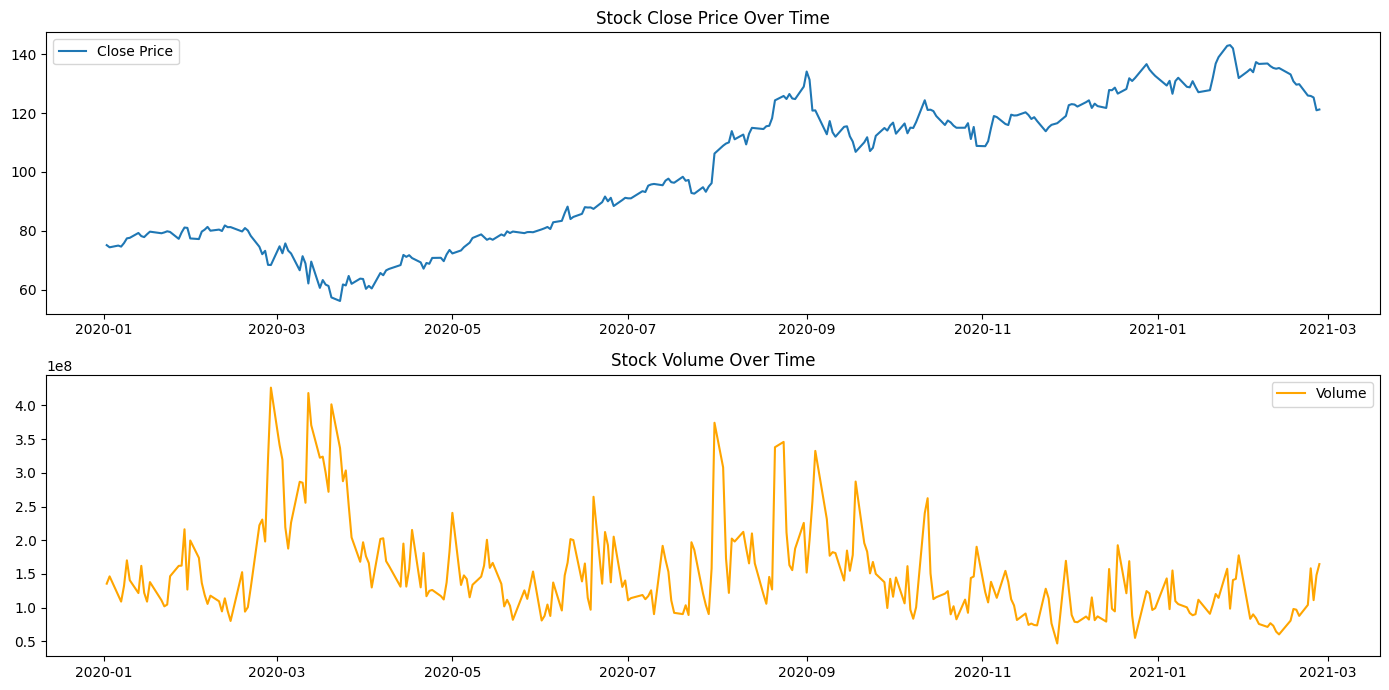

In [7]:
# Visualizing Stock Price Trends
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Stock Volume Over Time')
plt.legend()
plt.tight_layout()
plt.show()

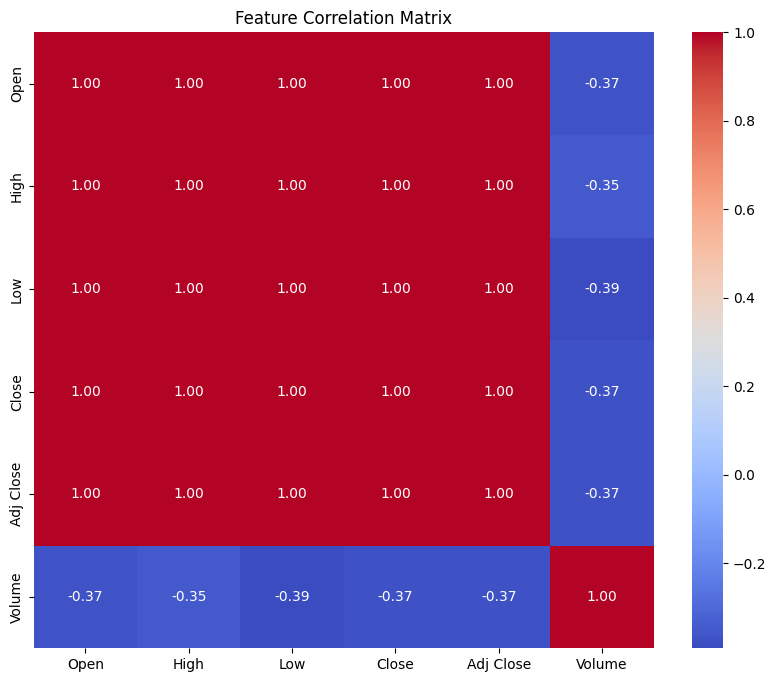

In [8]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

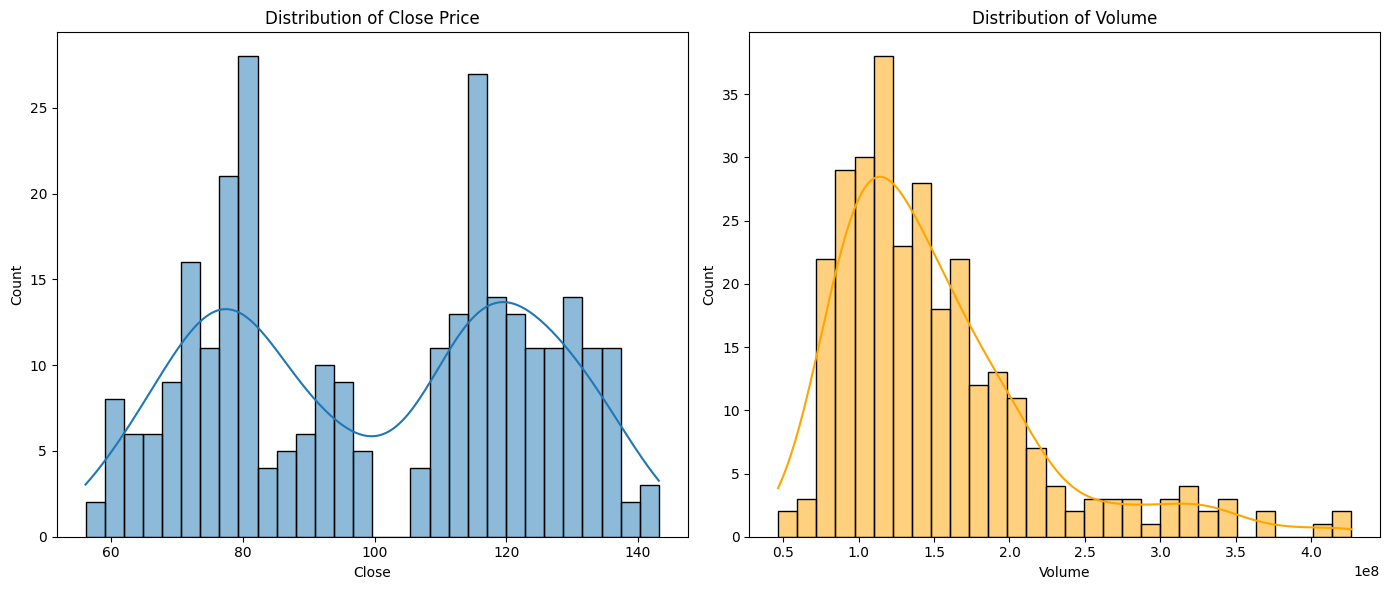

In [9]:
# Distribution of Features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Close Price')
plt.subplot(1, 2, 2)
sns.histplot(df['Volume'], bins=30, color='orange', kde=True)
plt.title('Distribution of Volume')
plt.tight_layout()
plt.show()

In [10]:
# Step 3: Data Preprocessing
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df = df.dropna() # Remove NaN values created by moving averages

# Splitting the dataset manually
train_df = df.loc['2020-01-01':'2021-01-01']
test_df = df.loc['2021-01-02':'2021-02-01']
validation_df = df.loc['2021-02-02':'2021-03-01']

# Prepare features and target for each set (assuming you're predicting Close prices using the same features)
X_train = train_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_train = train_df['Close']

X_test = test_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_test = test_df['Close']

X_validation = validation_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_validation = validation_df['Close']

In [11]:

# Step 4: Model Training
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred = random_forest_model.predict(X_test)


In [12]:
print(y_pred)

[131.59732567 131.08380112 130.1110244  130.64559998 131.82370392
 130.12940094 129.67372475 130.77320023 131.00510193 130.05012444
 128.73999924 130.88500137 135.34189972 134.98099792 134.77959778
 134.77959778 134.77959778 134.77959778 133.36780151 132.98520096]


In [13]:
print(y_test)

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
2021-01-19    127.830002
2021-01-20    132.029999
2021-01-21    136.869995
2021-01-22    139.070007
2021-01-25    142.919998
2021-01-26    143.160004
2021-01-27    142.059998
2021-01-28    137.089996
2021-01-29    131.960007
2021-02-01    134.139999
Name: Close, dtype: float64


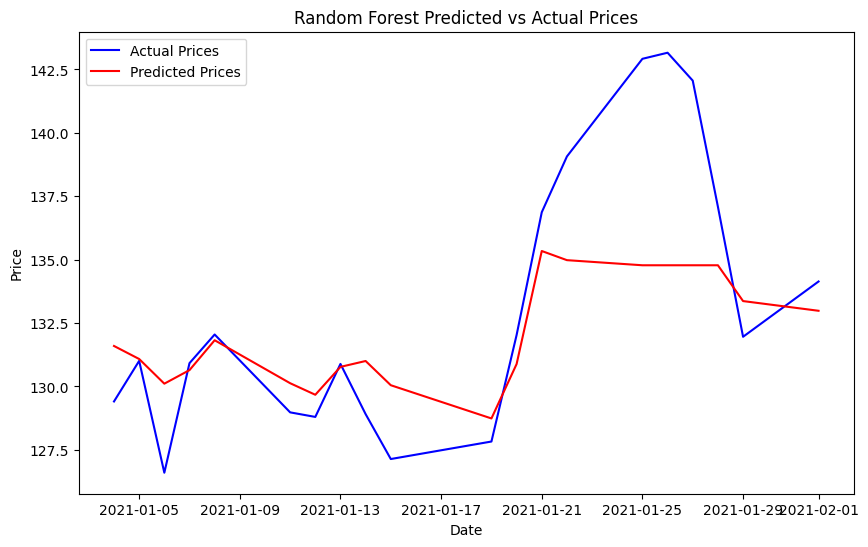

In [14]:
# Optional: Visualize Predictions
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('Random Forest Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:

# Step 5: Model Evaluation
# Additionally, perform predictions and evaluation on the validation set
y_pred_validation = random_forest_model.predict(X_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
r2_validation = r2_score(y_validation, y_pred_validation)
print(f"Validation RMSE: {rmse_validation}")
print(f"Validation R² score: {r2_validation}")

Validation RMSE: 1.8412738785451093
Validation R² score: 0.8773384257031247


In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.4882149353027345


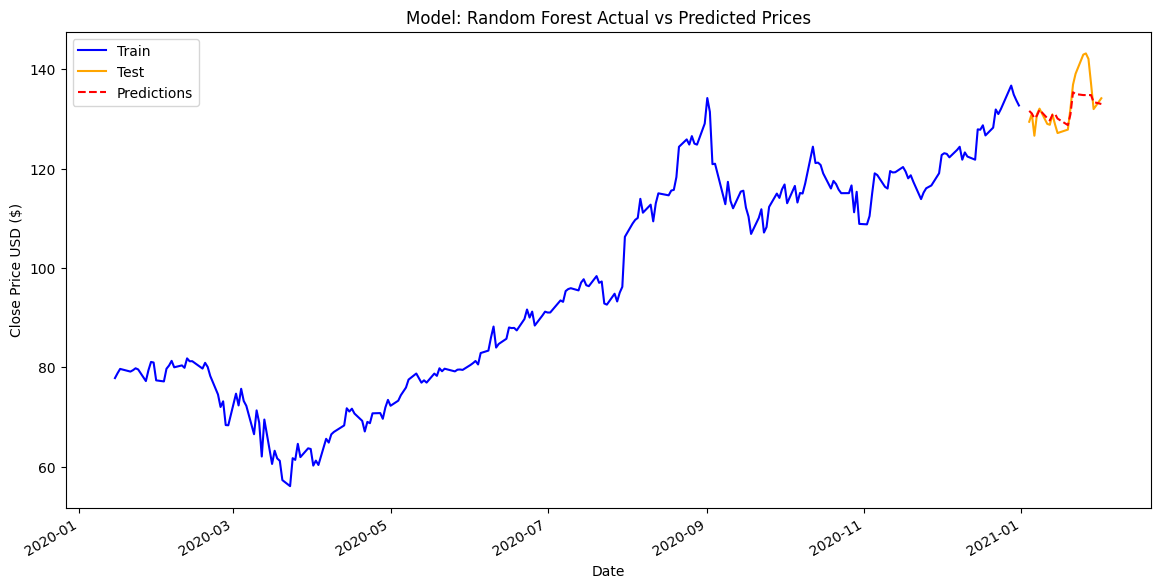

In [17]:
import matplotlib.pyplot as plt



# Plot the actual closing prices for the training set, the test set, and overlay the predictions
plt.figure(figsize=(14, 7))  # Set the size of the plot
plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')  # Training data in blue
plt.plot(test_df.index, test_df['Close'], label='Test', color='orange')  # Test data in orange
plt.plot(test_df.index, y_pred, label='Predictions', color='red', linestyle='--')  # Predictions in red dashed line

# Add title and labels
plt.title('Model: Random Forest Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Show legend
plt.legend()

# Optionally, you can format the x-axis to show dates better
plt.gcf().autofmt_xdate()  # Rotate the dates for better spacing

# Show the plot
plt.show()
